In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import os

In [3]:
from tensorflow.keras.models import Sequential

In [4]:
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [6]:
# Load Dataset

In [7]:
URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip' 
path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin = URL, extract = True)
PATH = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')

68608000/68606236 [==============================] - 0s 0us/step


In [8]:
train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')

In [9]:
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [10]:
num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))


In [11]:
num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))

total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val

In [12]:
print('Total training cats images:', num_cats_tr)
print('Total training dogs images:', num_dogs_tr)

print('Total validation cats images:', num_cats_val)
print('Total validation dogs images:', num_dogs_val)
print("--")

print("Total training images:", total_train)
print("Total validation images:", total_val)

Total training cats images: 1000
Total training dogs images: 1000
Total validation cats images: 500
Total validation dogs images: 500
--
Total training images: 2000
Total validation images: 1000


In [13]:
batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

In [14]:
# Data Preprocessing

In [15]:
train_image_generator = ImageDataGenerator(rescale = 1./255)
validation_image_generator = ImageDataGenerator(rescale = 1./255)


In [16]:
train_data_gen = train_image_generator.flow_from_directory(batch_size = batch_size,
                                                           directory = train_dir,
                                                           shuffle = True,
                                                           target_size = (IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode = 'binary')

Found 2000 images belonging to 2 classes.


In [17]:
val_data_gen = validation_image_generator.flow_from_directory(batch_size = batch_size,
                                                              directory = validation_dir,
                                                              shuffle = True,
                                                              target_size = (IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode = 'binary')

Found 1000 images belonging to 2 classes.


In [18]:
# Visualising Training Images

In [19]:
sample_training_images, _ = next(train_data_gen)

In [27]:
def plotImages(images_arr):
  fig, axes = plt.subplots(1, 5, figsize = (20, 20))
  axes = axes.flatten()
  for img, ax in zip( images_arr, axes):
    ax.imshow(img)
    ax.axis('off')
  plt.tight_layout()
  plt.show()


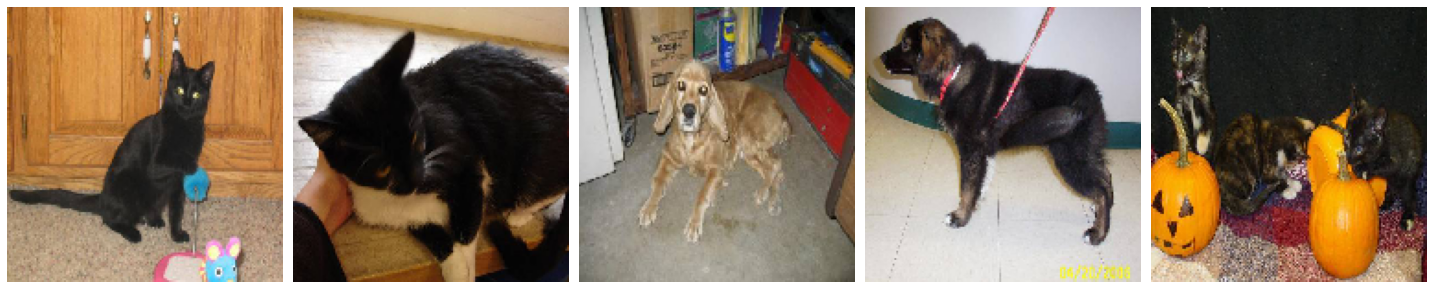

In [28]:
plotImages(sample_training_images[:5])

In [29]:
# Build a Model

In [35]:
model = Sequential([
      Conv2D(16, 3, padding = 'same', activation = 'relu', input_shape = (IMG_HEIGHT, IMG_WIDTH, 3)),
      MaxPooling2D(),
      Conv2D(32, 3, padding = 'same', activation = 'relu'),
      MaxPooling2D(),
      Conv2D(64, 3, padding = 'same', activation = 'relu'),
      MaxPooling2D(),
      Flatten(),
      Dense(512, activation='relu'),
      Dense(1)
])

In [36]:
model.compile(optimizer = 'adam',
              loss = tf.keras.losses.BinaryCrossentropy(from_logits = True),
              metrics = ['accuracy'])


In [37]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 18, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 20736)             0

In [40]:
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch = total_train // batch_size,
    epochs = epochs,
    validation_data = val_data_gen,
    validation_steps = total_val / batch_size  
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/15
15/15 [==============================] - 50s 3s/step - loss: 0.8910 - accuracy: 0.5021 - val_loss: 0.6894 - val_accuracy: 0.5000
Epoch 2/15
15/15 [==============================] - 49s 3s/step - loss: 0.6853 - accuracy: 0.5091 - val_loss: 0.6723 - val_accuracy: 0.5360
Epoch 3/15
15/15 [==============================] - 49s 3s/step - loss: 0.6575 - accuracy: 0.5705 - val_loss: 0.6349 - val_accuracy: 0.5930
Epoch 4/15
15/15 [==============================] - 49s 3s/step - loss: 0.6281 - accuracy: 0.6245 - val_loss: 0.6337 - val_accuracy: 0.6540
Epoch 5/15
15/15 [==============================] - 49s 3s/step - loss: 0.6053 - accuracy: 0.6282 - val_loss: 0.6127 - val_accuracy: 0.6700
Epoch 6/15
15/15 [==============================] - 49s 3s/step - loss: 0.5826 - accuracy: 0.6592 - val_loss: 0.5872 - val_accuracy: 0.6850
Epoch 7/15
15/15 [==============================] - 54s 4s/step - loss: 0.5485 - acc

In [41]:
# model accuracy was 85% around on validation data

In [42]:
model.save('my_catdog_model.h5')

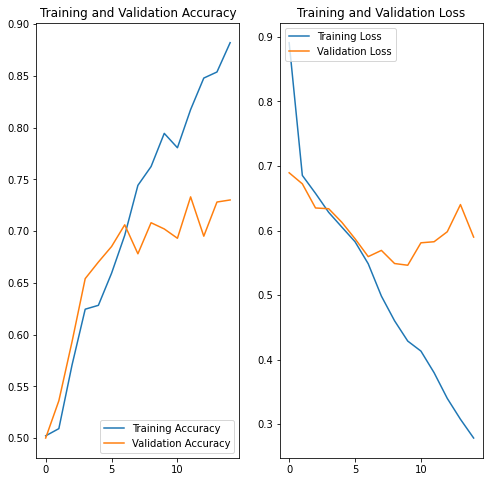

In [45]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize = (8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label = 'Training Accuracy')
plt.plot(epochs_range, val_acc, label = 'Validation Accuracy')
plt.legend(loc = 'lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label = 'Training Loss')
plt.plot(epochs_range, val_loss, label = 'Validation Loss')
plt.legend(loc = 'upper left')
plt.title('Training and Validation Loss')
plt.show()

In [46]:
# Horizontal Flip

In [47]:
image_gen = ImageDataGenerator(rescale=1./255, horizontal_flip = True)

In [48]:
train_data_gen = image_gen.flow_from_directory(batch_size = batch_size,
                                               directory = train_dir,
                                               shuffle = True,
                                               target_size = (IMG_HEIGHT, IMG_WIDTH))



Found 2000 images belonging to 2 classes.


In [50]:
image_gen.flow_from_directory(batch_size = batch_size,
                        directory = train_dir,
                        shuffle = True,
                        target_size = (IMG_HEIGHT, IMG_WIDTH))

Found 2000 images belonging to 2 classes.


In [52]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]

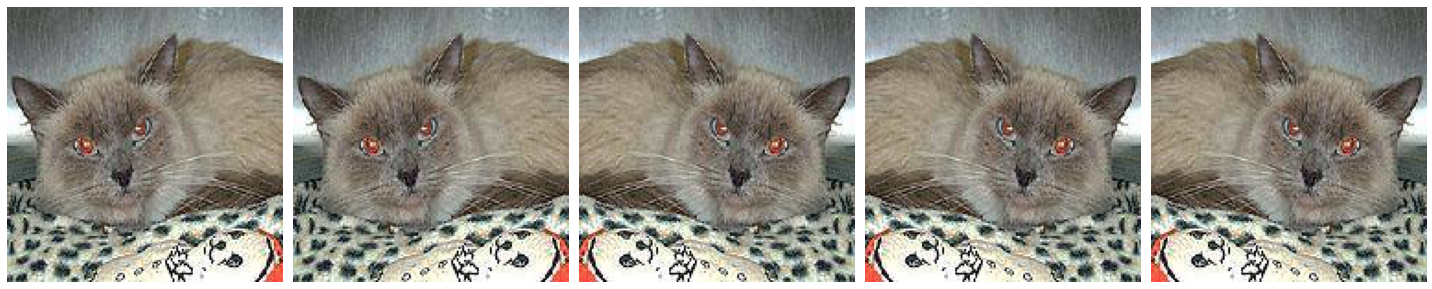

In [53]:
plotImages(augmented_images)

In [54]:
augmented_images = [train_data_gen[0][0][1] for i in range(5)]

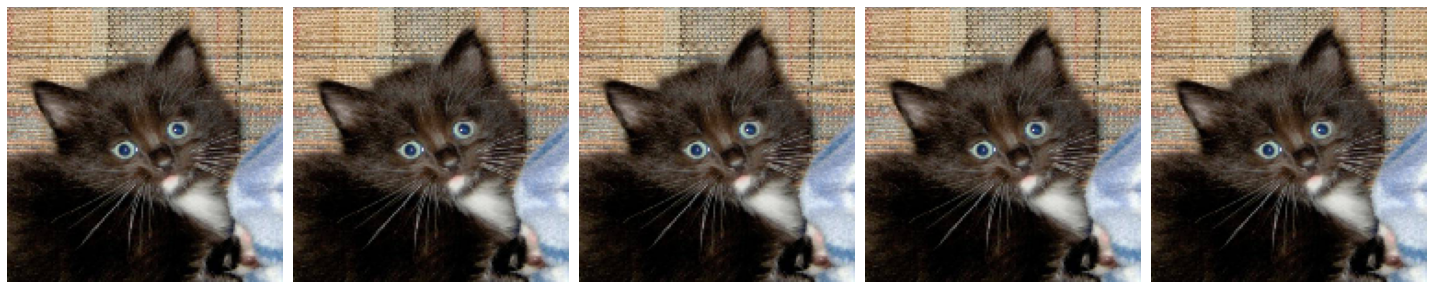

In [55]:
plotImages(augmented_images)

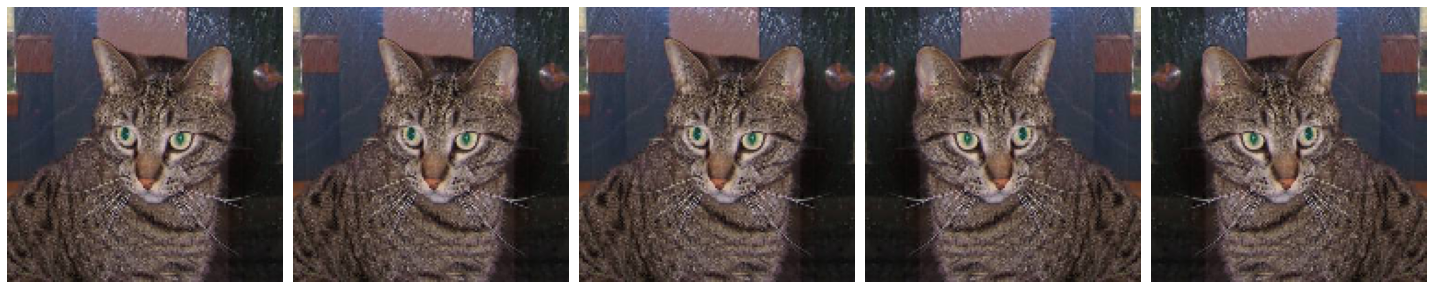

In [56]:
augmented_images = [train_data_gen[0][0][2] for i in range(5)]
plotImages(augmented_images)

In [57]:
# Randomly rotate the Image

In [58]:
image_gen = ImageDataGenerator(rescale=1./255, rotation_range = 45)

In [61]:
train_data_gen = image_gen.flow_from_directory(batch_size = batch_size,
                                               directory = train_dir,
                                               shuffle = True,
                                               target_size = (IMG_HEIGHT, IMG_WIDTH))

augmented_images = [train_data_gen[0][0][0] for i in range(5)]

Found 2000 images belonging to 2 classes.


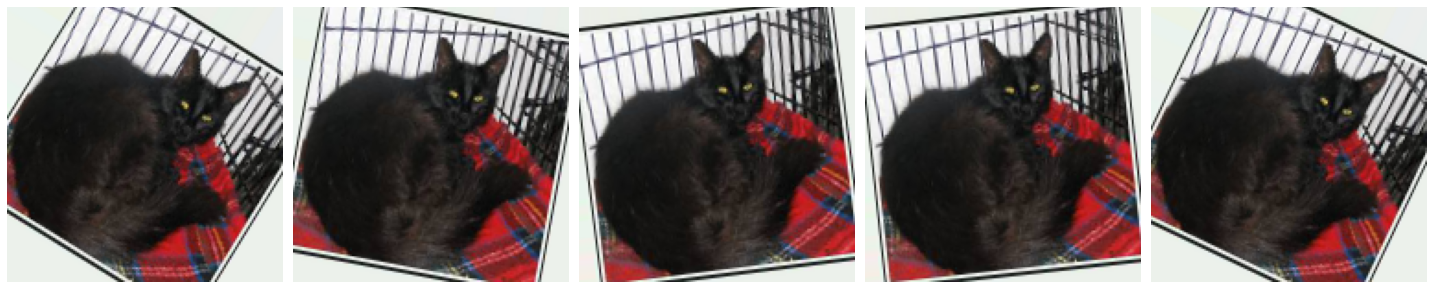

In [62]:
plotImages(augmented_images)

In [63]:
# Zoom the Image

In [64]:
image_gen = ImageDataGenerator(rescale=1./255, zoom_range = 0.5)

In [65]:
train_data_gen = image_gen.flow_from_directory(batch_size = batch_size,
                                               directory = train_dir,
                                               shuffle = True,
                                               target_size = (IMG_HEIGHT, IMG_WIDTH))

augmented_images = [train_data_gen[0][0][0] for i in range(5)]

Found 2000 images belonging to 2 classes.


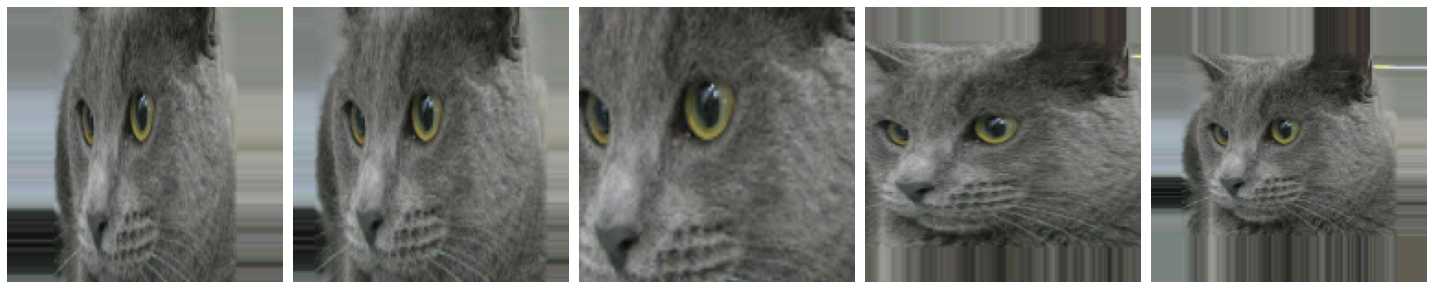

In [66]:
plotImages(augmented_images)